In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [20]:
# import data for the reail segment

wmt = pd.read_csv(r"/content/drive/MyDrive/WMT.csv", index_col = "Date", parse_dates = True)["Adj Close"]
cost = pd.read_csv(r"/content/drive/MyDrive/COST.csv", index_col = "Date", parse_dates = True)["Adj Close"]
dg = pd.read_csv(r"/content/drive/MyDrive/DG.csv", index_col = "Date", parse_dates = True)["Adj Close"]

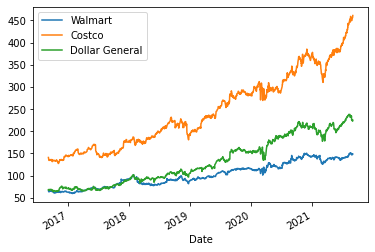

In [24]:
wmt.plot()
cost.plot()
dg.plot()
plt.legend(["Walmart", "Costco", "Dollar General"])
plt.show()

In [28]:
retail = pd.concat([wmt, cost, dg], axis = 1)

In [31]:
retail.columns = ["--WALMART--", "--COSTCO--", "--DOLLAR GENERAL--"]

In [32]:
retail.head()

,--WALMART--,--COSTCO--,--DOLLAR GENERAL--
Date,,,
2016-09-06,65.758080,140.896622,68.342621
2016-09-07,64.911324,138.739395,68.105331
2016-09-08,64.704163,136.805038,67.080215
2016-09-09,63.325943,134.335831,66.994766
2016-09-12,64.803238,135.218338,68.366478


In [33]:
retail_returns = retail.pct_change(1).dropna()

In [34]:
retail_returns.head()

,--WALMART--,--COSTCO--,--DOLLAR GENERAL--
Date,,,
2016-09-07,-0.012877,-0.015311,-0.003472
2016-09-08,-0.003191,-0.013942,-0.015052
2016-09-09,-0.021300,-0.018049,-0.001274
2016-09-12,0.023328,0.006569,0.020475
2016-09-13,-0.006672,-0.006263,-0.019368


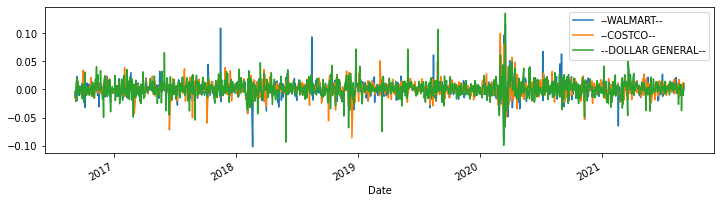

In [36]:
retail_returns.plot(figsize = (12,3))

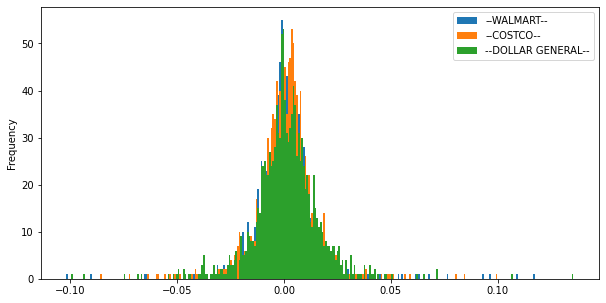

In [41]:
retail_returns.plot(kind = "hist", bins = 300, figsize = (10, 5))

# CUMULATIVE RETURNS

In [66]:
cum_wmt = (1 + retail_returns["--WALMART--"]).cumprod() - 1
cum_cost = (1 + retail_returns["--COSTCO--"]).cumprod() - 1
cum_dg = (1 + retail_returns["--DOLLAR GENERAL--"]).cumprod() - 1

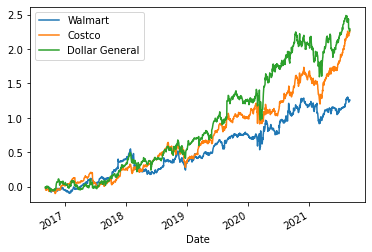

In [67]:
cum_wmt.plot()
cum_cost.plot()
cum_dg.plot()
plt.legend(["Walmart", "Costco", "Dollar General"])
plt.show()

In [75]:
retail_portfolio_returns = np.dot([0.33, 0.33, 0.33], [cum_wmt[-1], cum_cost[-1], cum_dg[-1]])
print(f"The total returns from an equal weighted portfolio of Walmart, Costco and Dollar General shares is : {round(retail_portfolio_returns * 100, 2)}%")

The total returns from an equal weighted portfolio of Walmart, Costco and Dollar General shares is : 192.14%
